In [1]:
import imgaug as ia
from imgaug import augmenters as iaa
import numpy as np
import imageio
import cv2
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

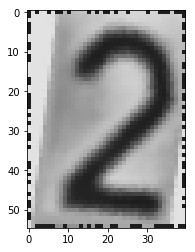

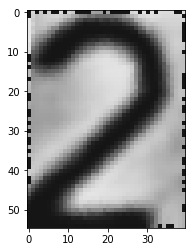

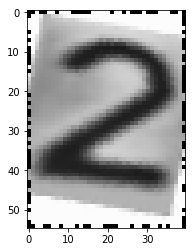

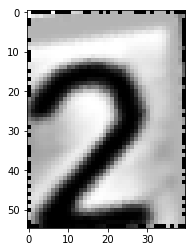

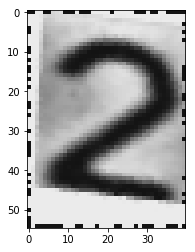

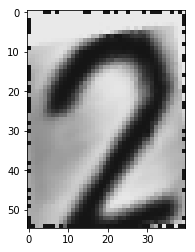

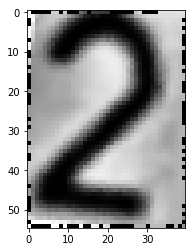

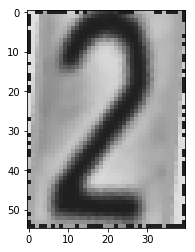

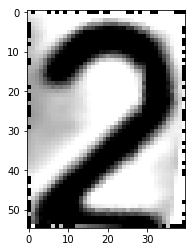

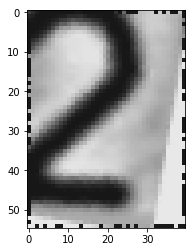

In [60]:
img_dir ='NewDataset/train/2/2.'
ia.seed(1)
for m in range (1):
    img = cv2.imread(img_dir+str(35)+'.bmp') #read image
    images = np.array(
        [img for _ in range(10)], dtype=np.uint8)  
   
    seq = iaa.Sequential([
    iaa.Crop(percent=(0, 0.1)),
    iaa.Pad(percent =(0,0.2),pad_cval=180),
    #iaa.Superpixels(n_segments=50,p_replace=0.10),
    #iaa.Multiply((0.5, 1.2)),
    iaa.Sometimes(0.6, iaa.GaussianBlur(sigma=(0.25, 0.8))),
    iaa.Sometimes(0.8,iaa.AdditiveGaussianNoise(
        loc=0, scale=(0.0, 0.05 * 255))),
    #iaa.Dropout(p=(0.0,0.15)),
    #iaa.SaltAndPepper(p=(0.0,0.1)),
    iaa.Sometimes(0.5,iaa.CoarseSaltAndPepper(p=0.0,size_percent=0.30)),
    iaa.ContrastNormalization(alpha=(0.6,1.3)),
    iaa.Grayscale(alpha=1.0),
    iaa.PerspectiveTransform(scale=(0,0.125)),
    iaa.ElasticTransformation(sigma=0.2,alpha=0.2),
    #iaa.Sometimes(0.7,iaa.CoarseSalt(p=0.2,size_percent=0.03)),
    iaa.ContrastNormalization((0.75, 1.5)), 
    #iaa.Sometimes(0.8, iaa.CoarseDropout(p=(0.0,0.2),size_percent=(0.0,0.5))),
    #iaa.Sometimes(1,iaa.Affine(cval=(255))),
    iaa.Affine(
        scale={"x": (0.8, 1.2), "y": (0.8, 1.2)},
        translate_percent={"x": (-0.1, 0.1), "y": (-0.1, 0.1)},
        rotate=(-10, 10),
        shear=(-5, 5),
        cval=(255)
    )
], random_order=True)  # apply augmenters in random order

images_aug = seq.augment_images(images)
for i in range(10):
    plt.imshow(images_aug[i])
    plt.show()